#### Git Configs

In [ ]:
username = 'ayodyak'
repo = 'Y2_S1_Batch02_Ku28'

In [ ]:
!git clone https://github.com/{username}/{repo}
%cd {repo}

Cloning into 'Y2_S1_Batch02_Ku28'...
remote: Enumerating objects: 71512, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 71512 (delta 1), reused 11 (delta 1), pack-reused 71493 (from 1)
Receiving objects: 100% (71512/71512), 1.43 GiB | 26.64 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (71463/71463), done.
/content/Y2_S1_Batch02_Ku28


#### 01.Resizing Images


Attempting to load image from: /content/Y2_S1_Batch02_Ku28/data/raw/Dataset/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG
✅ Image loaded successfully!


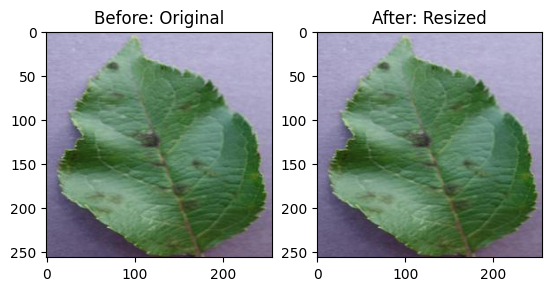

✅ Test image resized and saved as 'resized_leaf.jpg'.
🎉 All images resized successfully! Check 'results/outputs' folder.


In [ ]:

# Step 1: Import required libraries

import cv2                  # For image operations (read, resize, save)
import os                   # For working with files and folders
import matplotlib.pyplot as plt  # For showing images

# Step 2: Load one test image (to check resizing works correctly)

image_path = 'data/raw/Dataset/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'

# Show the absolute path (useful for debugging if path is wrong)
absolute_image_path = os.path.abspath(image_path)
print(f"Attempting to load image from: {absolute_image_path}")

# Load the image
original_image = cv2.imread(image_path)

# If image cannot be loaded → show error
if original_image is None:
    print(f"❌ Error: Could not load image from {image_path}. Please check the path and file.")
else:
    print("✅ Image loaded successfully!")
    # Step 3: Resize the image

    new_size = (256, 256)  # New size (width=256, height=256)
    resized_image = cv2.resize(original_image, new_size)  # Resize to 256x256


    # Step 4: Show before and after images

    plt.subplot(1, 2, 1)   # Show original on left
    plt.title('Before: Original')
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))  # Convert BGR→RGB for display

    plt.subplot(1, 2, 2)   # Show resized on right
    plt.title('After: Resized')
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

    plt.show()  # Display both images


    # Step 5: Save the resized test image

    output_dir = 'data/technic 1'   # Output folder
    os.makedirs(output_dir, exist_ok=True)  # Create folder if not exists
    cv2.imwrite(os.path.join(output_dir, 'resized_leaf.jpg'), resized_image)
    print("✅ Test image resized and saved as 'resized_leaf.jpg'.")


# Step 6: Resize ALL images in dataset


folder_path = 'data/raw/Dataset'   # Main dataset folder (with subfolders)
output_dir = 'data/technic 1'     # Output folder for resized images
new_size = (256, 256)              # Resize size

os.makedirs(output_dir, exist_ok=True)  # Make sure output folder exists

# Walk through all folders and files inside dataset
for root, dirs, files in os.walk(folder_path):
    for filename in files:
        # Process only image files
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(root, filename)   # Full path of image
            img = cv2.imread(img_path)

            if img is not None:
                # Resize the image
                resized = cv2.resize(img, new_size)

                # Preserve folder structure in output
                relative_path = os.path.relpath(root, folder_path)   # e.g. "Apple___Apple_scab"
                save_dir = os.path.join(output_dir, relative_path)   # e.g. "results/outputs/Apple___Apple_scab"
                os.makedirs(save_dir, exist_ok=True)                 # Create subfolder if not exists

                # Save resized image
                save_path = os.path.join(save_dir, filename)
                cv2.imwrite(save_path, resized)
            else:
                print(f"⚠️ Warning: Could not load {img_path}. Skipping.")

print("🎉 All images resized successfully! Check 'results/outputs' folder.")



EDA Process

In [ ]:
import random
dataset_path = 'data/technic 1'  # Folder with all resized images
classes = os.listdir(dataset_path)  # List all class folders

Show class Distribution

✅ Classes found in dataset:
1. Potato___Late_blight
2. Corn_(maize)___healthy
3. Tomato_Spider_mites_Two_spotted_spider_mite
4. Corn_(maize)___Northern_Leaf_Blight
5. Apple___Cedar_apple_rust
6. Pepper__bell___healthy
7. Pepper__bell___Bacterial_spot
8. Tomato__Tomato_YellowLeaf__Curl_Virus
9. Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
10. Tomato_healthy
11. Corn_(maize)___Common_rust_
12. Tomato_Septoria_leaf_spot
13. Tomato_Early_blight
14. Potato___Early_blight
15. Tomato__Tomato_mosaic_virus
16. Apple___Apple_scab
17. Apple___healthy
18. Tomato_Leaf_Mold
19. Tomato_Bacterial_spot
20. Tomato__Target_Spot
21. Apple___Black_rot
22. Potato___healthy
23. Tomato_Late_blight

Number of images per class:
Potato___Late_blight: 1000
Corn_(maize)___healthy: 1859
Tomato_Spider_mites_Two_spotted_spider_mite: 1676
Corn_(maize)___Northern_Leaf_Blight: 1908
Apple___Cedar_apple_rust: 1760
Pepper__bell___healthy: 1478
Pepper__bell___Bacterial_spot: 997
Tomato__Tomato_YellowLeaf__Curl_Virus: 

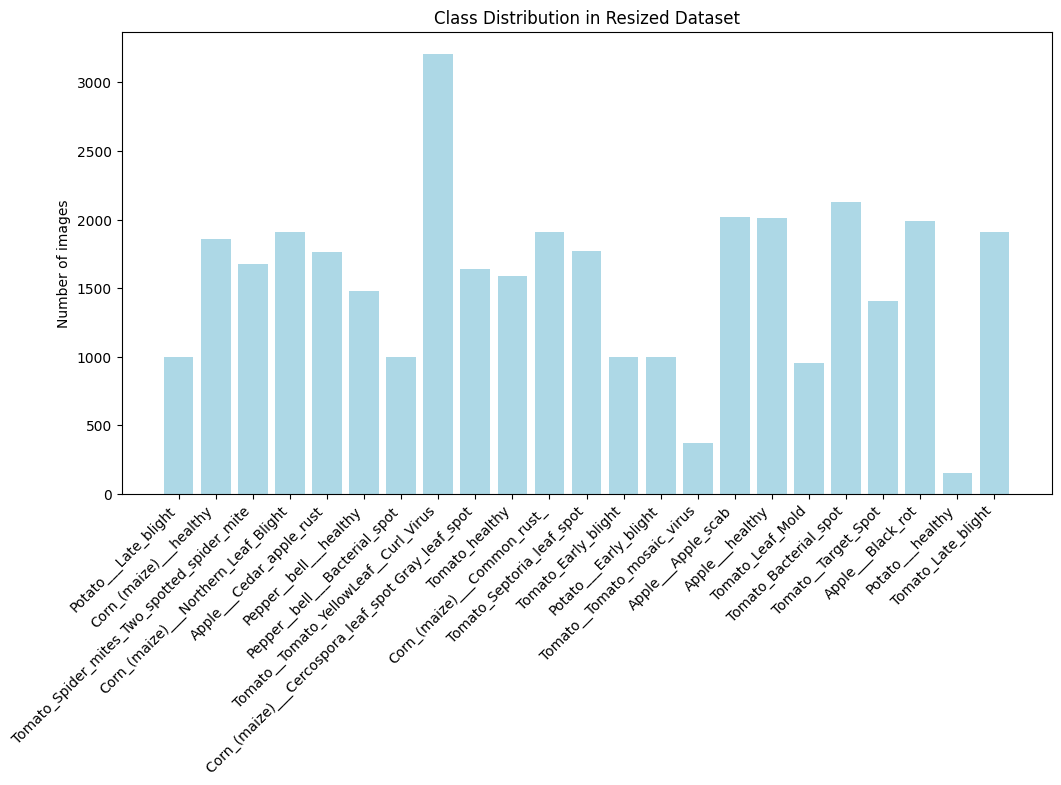

In [ ]:
import os
import matplotlib.pyplot as plt

# Step 1: Set path to your resized dataset
dataset_path = 'data/technic 1'  # Folder where resized images are stored

# Step 2: List all classes (subfolders)
classes = [cls for cls in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, cls))]
print("✅ Classes found in dataset:")
for i, cls in enumerate(classes, 1):
    print(f"{i}. {cls}")

# Step 3: Count number of images per class
class_counts = {cls: len([f for f in os.listdir(os.path.join(dataset_path, cls)) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
                for cls in classes}

# Print counts
print("\nNumber of images per class:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

# Step 4: Visualize class distribution (bar chart)
plt.figure(figsize=(12,6))
plt.bar(class_counts.keys(), class_counts.values(), color='lightblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of images')
plt.title('Class Distribution in Resized Dataset')
plt.show()

Show random sample images


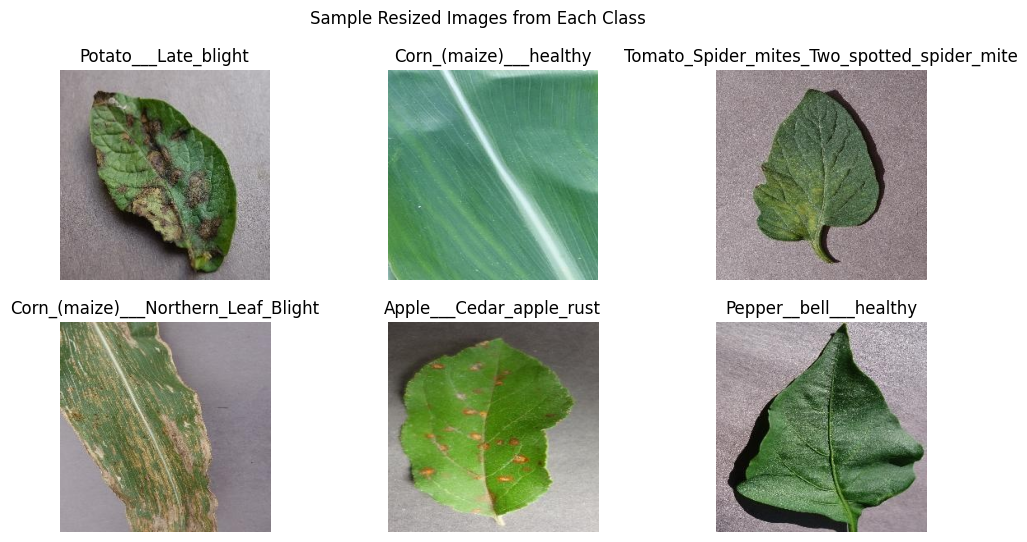

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

dataset_path = 'data/technic 1'  # Folder with all resized images
classes = os.listdir(dataset_path)  # List all class folders

plt.figure(figsize=(12, 6))  # Make a wide figure for plots

for i, cls in enumerate(classes[:6]):  # Show 6 classes for example
    class_folder = os.path.join(dataset_path, cls)
    # Ensure the class_folder is a directory before listing its contents
    if os.path.isdir(class_folder):
        sample_img = random.choice(os.listdir(class_folder))  # Pick a random image
        img = cv2.imread(os.path.join(class_folder, sample_img))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

        plt.subplot(2, 3, i+1)  # Plot in a grid: 2 rows, 3 columns
        plt.imshow(img)
        plt.title(cls)           # Show the class name as title
        plt.axis('off')          # Hide axes for cleaner look
    else:
        print(f"Skipping {class_folder} as it is not a directory.")


plt.suptitle("Sample Resized Images from Each Class")  # Overall title
plt.show()

Count images per class

Check image dimensions

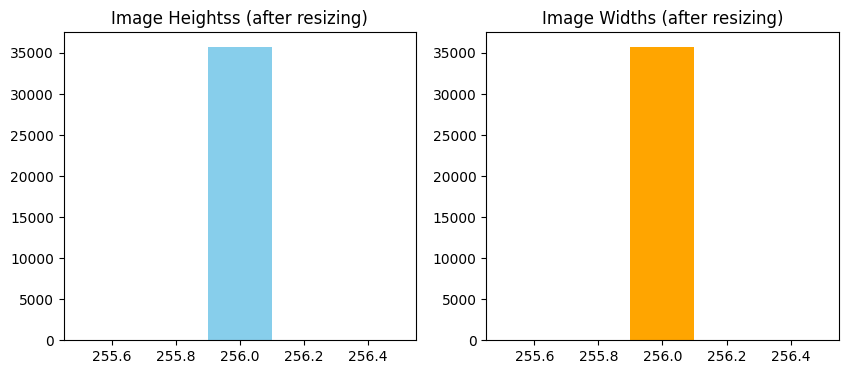

In [ ]:
heights, widths = [], []

# Ensure classes is defined before using it
dataset_path = 'data/technic 1'
classes = [cls for cls in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, cls))]


for cls in classes:
    class_folder = os.path.join(dataset_path, cls)
    for img_file in os.listdir(class_folder):
        img = cv2.imread(os.path.join(class_folder, img_file))
        if img is not None:  # Check if image was loaded successfully
            h, w = img.shape[:2]  # Get height and width
            heights.append(h)
            widths.append(w)
        else:
             print(f"Warning: Could not load image {img_file} in {class_folder}. Skipping.")


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(heights, bins=5, color='skyblue')
plt.title('Image Heightss (after resizing)')

plt.subplot(1,2,2)
plt.hist(widths, bins=5, color='orange')
plt.title('Image Widths (after resizing)')

plt.show()

#### 02. Scale and Retinex Algorithm

In [ ]:
import os
from PIL import Image
import numpy as np
from PIL import Image, ImageEnhance
from collections import Counter
import random

In [ ]:

dataset_path = '/content/Y2_S1_Batch02_Ku28/data/technic 1'

# Get only directory names inside Dataset
class_names = [
    name for name in os.listdir(dataset_path)
    if os.path.isdir(os.path.join(dataset_path, name))
]

print(class_names)



['Potato___Late_blight', 'Corn_(maize)___healthy', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Corn_(maize)___Northern_Leaf_Blight', 'Apple___Cedar_apple_rust', 'Pepper__bell___healthy', 'Pepper__bell___Bacterial_spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato_healthy', 'Corn_(maize)___Common_rust_', 'Tomato_Septoria_leaf_spot', 'Tomato_Early_blight', 'Potato___Early_blight', 'Tomato__Tomato_mosaic_virus', 'Apple___Apple_scab', 'Apple___healthy', 'Tomato_Leaf_Mold', 'Tomato_Bacterial_spot', 'Tomato__Target_Spot', 'Apple___Black_rot', 'Potato___healthy', 'Tomato_Late_blight']


In [ ]:


src_root = '/content/Y2_S1_Batch02_Ku28/data/technic 1'
dst_root = '/content/Y2_S1_Batch02_Ku28/data/technic_scale'

# create destination root if not exists
os.makedirs(dst_root, exist_ok=True)

def normalize_image(img: Image.Image) -> Image.Image:
    """Scale pixel values to [0,1] then back to 0–255 as uint8 for saving."""
    arr = np.asarray(img).astype('float32') / 255.0    # scale to [0,1]
    arr = (arr * 255).astype('uint8')                  # back to uint8 for file
    return Image.fromarray(arr)

for class_name in os.listdir(src_root):
    class_path = os.path.join(src_root, class_name)
    if not os.path.isdir(class_path):
        continue

    # make matching class folder in destination
    dst_class_path = os.path.join(dst_root, class_name)
    os.makedirs(dst_class_path, exist_ok=True)

    for file in os.listdir(class_path):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            src_file = os.path.join(class_path, file)
            dst_file = os.path.join(dst_class_path, file)

            img = Image.open(src_file).convert('RGB')
            img_norm = normalize_image(img)
            img_norm.save(dst_file)


In [ ]:
!pip install scikit-image opencv-python matplotlib tqdm


Retinex Algorithm

/tmp/ipython-input-3678477199.py:35: RuntimeWarning: invalid value encountered in power
  return np.uint8(255.0 * (img_norm ** (1.0 / gamma)))
/tmp/ipython-input-3678477199.py:35: RuntimeWarning: invalid value encountered in cast
  return np.uint8(255.0 * (img_norm ** (1.0 / gamma)))


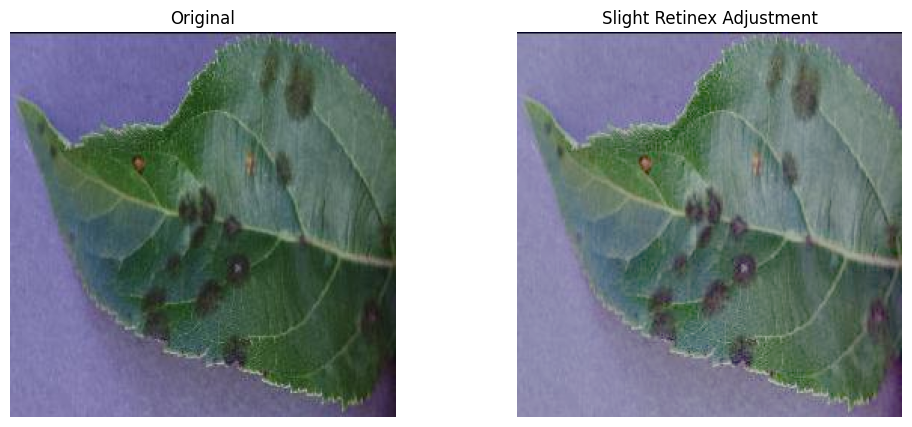

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
from tqdm import tqdm

# --- 1. Load image ---
img_path = "/content/Y2_S1_Batch02_Ku28/data/technic_scale/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_90deg.JPG"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)

# --- 2. Softer Multi-Scale Retinex ---
def multi_scale_retinex(img, sigmas=[15, 40]):
    log_img = np.log10(img + 1.0)
    retinex = np.zeros_like(img)
    for s in sigmas:
        blur = cv2.GaussianBlur(img, (0, 0), s)
        retinex += log_img - np.log10(blur + 1.0)
    retinex /= len(sigmas)
    retinex = cv2.normalize(retinex, None, 0, 255, cv2.NORM_MINMAX)
    return retinex

# --- 3. Simple color balance (very light) ---
def simple_color_balance(img, low_clip=0.5, high_clip=0.5):
    out = np.zeros_like(img)
    for c in range(3):
        flat = img[:, :, c].flatten()
        low_val = np.percentile(flat, low_clip)
        high_val = np.percentile(flat, 100 - high_clip)
        channel = np.clip(img[:, :, c], low_val, high_val)
        out[:, :, c] = cv2.normalize(channel, None, 0, 255, cv2.NORM_MINMAX)
    return out

# --- 4. Mild gamma darkening ---
def gamma_correct(img, gamma=1.3):
    img_norm = img / 255.0
    return np.uint8(255.0 * (img_norm ** (1.0 / gamma)))

# --- 5. Pipeline with blending to keep it subtle ---
retinex = multi_scale_retinex(img)
retinex = simple_color_balance(retinex)

# Blend 70% original + 30% retinex for a slight change
blended = 0.7 * img + 0.18 * retinex
blended = gamma_correct(blended)

# --- 6. Display ---
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(np.uint8(img))
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(blended.astype(np.uint8))
plt.title("Slight Retinex Adjustment")
plt.axis("off")
plt.show()


In [ ]:


# ---------- Paths ----------
src_root = "/content/Y2_S1_Batch02_Ku28/data/technic_scale"
dst_root = "/content/Y2_S1_Batch02_Ku28/data/processed_retinex"
os.makedirs(dst_root, exist_ok=True)

# ---------- Retinex + blend helpers ----------
def multi_scale_retinex(img, sigmas=[15, 40]):
    log_img = np.log10(img + 1.0)
    retinex = np.zeros_like(img)
    for s in sigmas:
        blur = cv2.GaussianBlur(img, (0, 0), s)
        retinex += log_img - np.log10(blur + 1.0)
    retinex /= len(sigmas)
    retinex = cv2.normalize(retinex, None, 0, 255, cv2.NORM_MINMAX)
    return retinex

def simple_color_balance(img, low_clip=0.5, high_clip=0.5):
    out = np.zeros_like(img)
    for c in range(3):
        flat = img[:, :, c].flatten()
        low_val = np.percentile(flat, low_clip)
        high_val = np.percentile(flat, 100 - high_clip)
        channel = np.clip(img[:, :, c], low_val, high_val)
        out[:, :, c] = cv2.normalize(channel, None, 0, 255, cv2.NORM_MINMAX)
    return out

def gamma_correct(img, gamma=1.3):
    img_norm = img / 255.0
    return np.uint8(255.0 * (img_norm ** (1.0 / gamma)))

def gentle_retinex(img):
    r = multi_scale_retinex(img)
    r = simple_color_balance(r)
    blended = 0.7 * img + 0.18 * r    # <-- your preferred blend
    blended = gamma_correct(blended)
    return np.uint8(blended)

# ---------- Process the whole dataset ----------
extensions = ("*.jpg","*.jpeg","*.png","*.JPG","*.JPEG","*.PNG")
image_paths = []
for ext in extensions:
    image_paths.extend(glob(os.path.join(src_root, "**", ext), recursive=True))

for src_path in tqdm(image_paths, desc="Processing images"):
    rel_path = os.path.relpath(src_path, src_root)
    dst_path = os.path.join(dst_root, rel_path)
    os.makedirs(os.path.dirname(dst_path), exist_ok=True)

    img = cv2.imread(src_path)
    if img is None:
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)

    out_img = gentle_retinex(img)

    # Save back to disk as JPEG (RGB→BGR for OpenCV write)
    cv2.imwrite(dst_path, cv2.cvtColor(out_img, cv2.COLOR_RGB2BGR))

print(" All images processed and saved to:", dst_root)


Processing images:   0%|          | 0/35725 [00:00<?, ?it/s]/tmp/ipython-input-1472683154.py:35: RuntimeWarning: invalid value encountered in power
  return np.uint8(255.0 * (img_norm ** (1.0 / gamma)))
/tmp/ipython-input-1472683154.py:35: RuntimeWarning: invalid value encountered in cast
  return np.uint8(255.0 * (img_norm ** (1.0 / gamma)))
Processing images: 100%|██████████| 35725/35725 [26:29<00:00, 22.48it/s]

✅ All images processed and saved to: /content/Y2_S1_Batch02_Ku28/data/processed_retinex


EDA Visualization

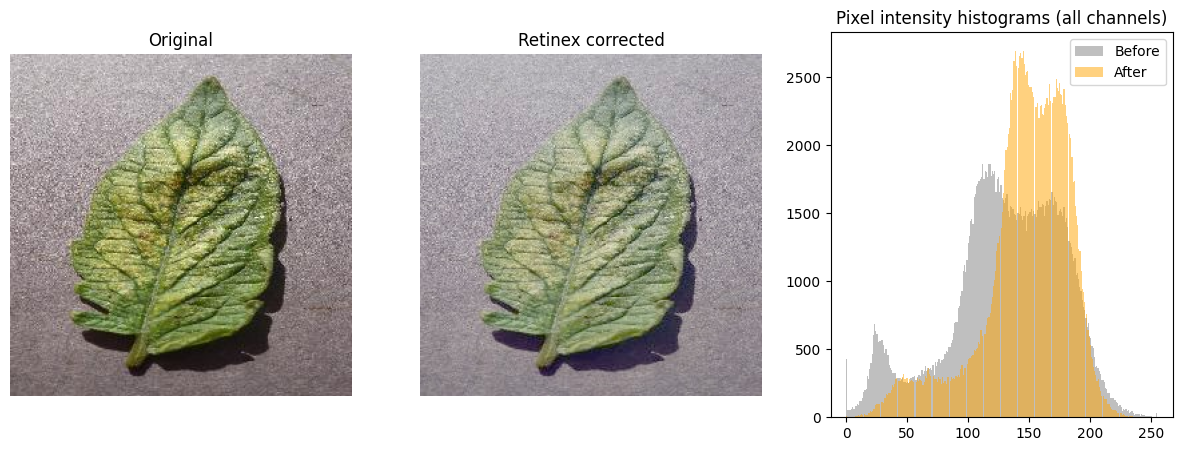

Mean brightness (V channel) - before: 142.9, after: 154.5



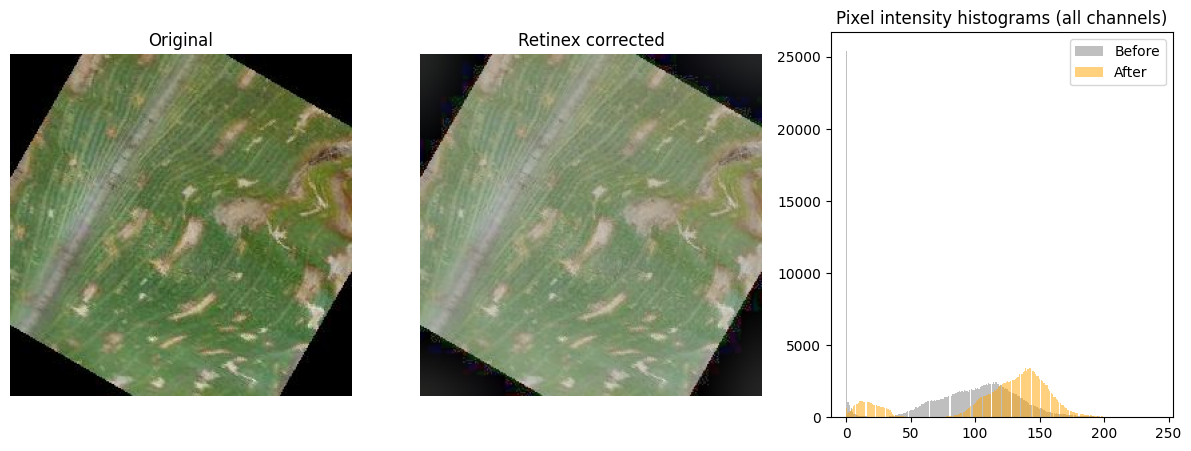

Mean brightness (V channel) - before: 107.6, after: 131.0



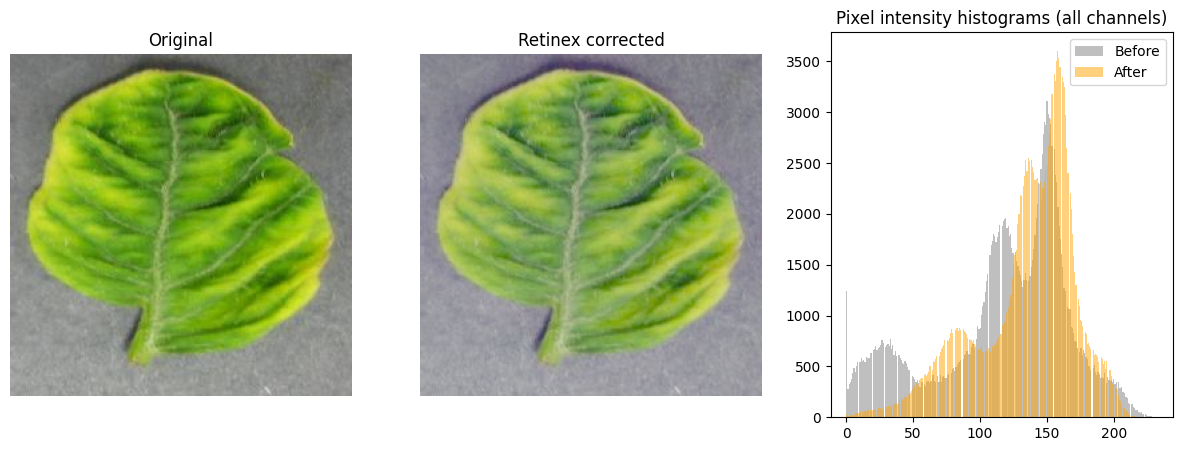

Mean brightness (V channel) - before: 150.9, after: 159.4



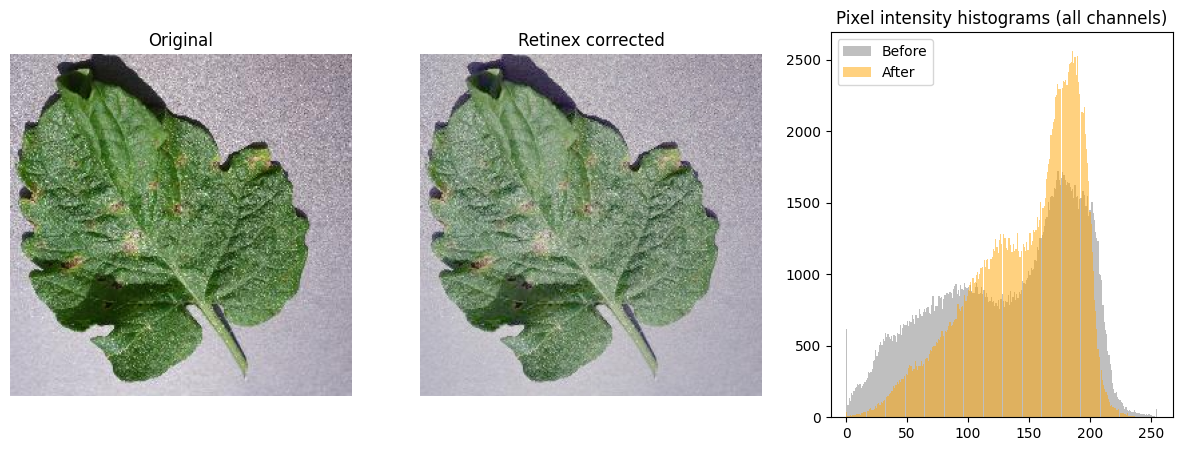

Mean brightness (V channel) - before: 149.2, after: 158.6



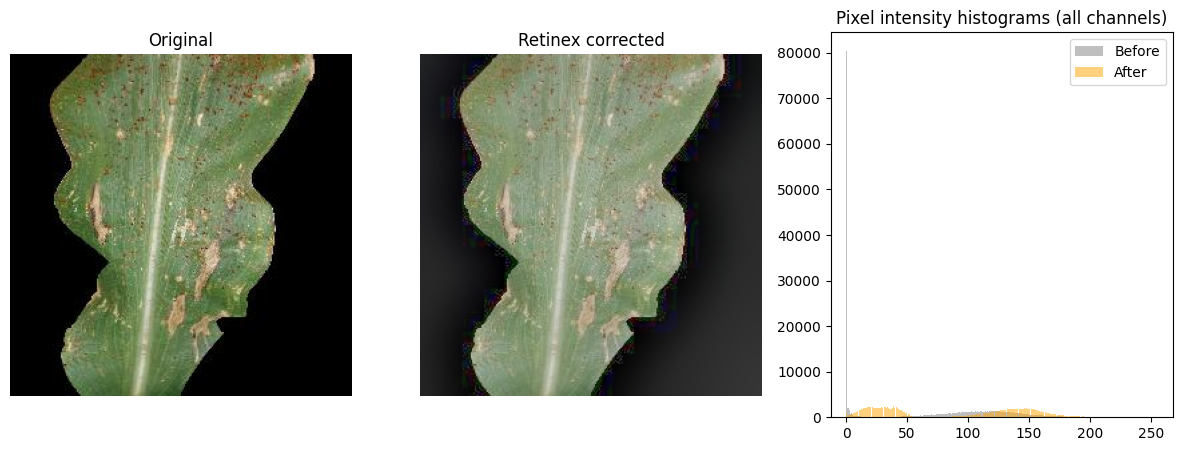

Mean brightness (V channel) - before: 74.9, after: 98.9



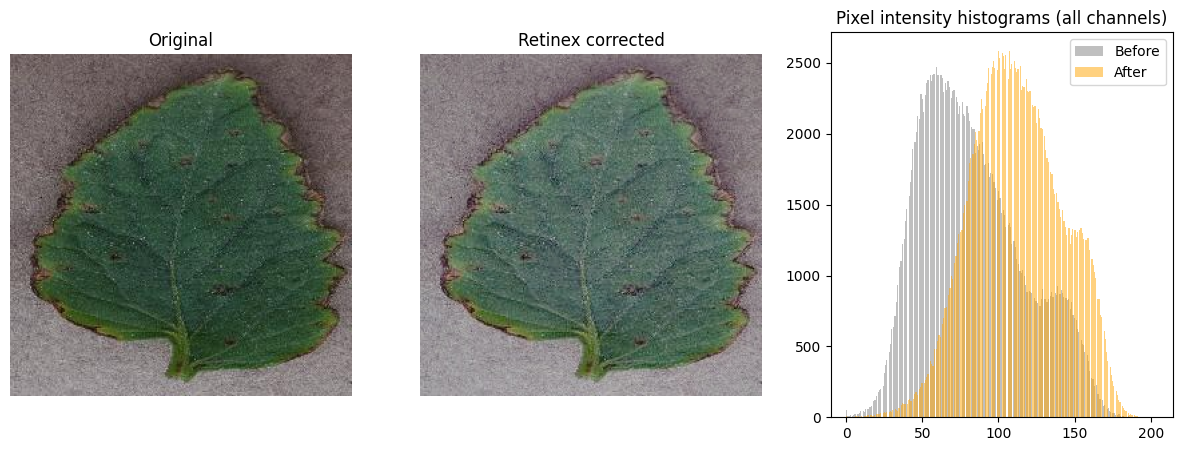

Mean brightness (V channel) - before: 95.4, after: 121.4



In [ ]:
import os, glob, random
import cv2
import numpy as np
import matplotlib.pyplot as plt

src_root = "/content/Y2_S1_Batch02_Ku28/data/technic_scale"
dst_root = "/content/Y2_S1_Batch02_Ku28/data/processed_retinex"

def mean_brightness_rgb(img_rgb):
    """Return mean brightness (V channel) of an RGB image."""
    hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
    return float(hsv[:, :, 2].mean())

# --- pick random sample images from each class ---
sample_paths = []
for cls in os.listdir(src_root):
    cls_path = os.path.join(src_root, cls)
    if not os.path.isdir(cls_path):
        continue
    imgs = glob.glob(os.path.join(cls_path, '*'))
    jpgs = [p for p in imgs if p.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if jpgs:
        sample_paths.append(random.choice(jpgs))

# --- compare up to 6 samples ---
for src in sample_paths[:6]:
    rel = os.path.relpath(src, src_root)
    dst = os.path.join(dst_root, rel)
    if not os.path.exists(dst):
        continue  # skip if processed file not present

    before = cv2.cvtColor(cv2.imread(src), cv2.COLOR_BGR2RGB)
    after  = cv2.cvtColor(cv2.imread(dst), cv2.COLOR_BGR2RGB)

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(before); ax[0].set_title('Original'); ax[0].axis('off')
    ax[1].imshow(after);  ax[1].set_title('Retinex corrected'); ax[1].axis('off')

    # Combined RGB histogram
    ax[2].hist(before.ravel(), bins=256, alpha=0.5, label='Before', color='gray')
    ax[2].hist(after.ravel(),  bins=256, alpha=0.5, label='After',  color='orange')
    ax[2].set_title('Pixel intensity histograms (all channels)')
    ax[2].legend()
    plt.show()

    print("Mean brightness (V channel) - before: {:.1f}, after: {:.1f}\n"
          .format(mean_brightness_rgb(before), mean_brightness_rgb(after)))


#### 03.Data Augmentation

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# ---------------- Step 1: Define paths ----------------
src_root = "/content/Y2_S1_Batch02_Ku28/data/processed_retinex"   # original images
dest_root = "/content/Y2_S1_Batch02_Ku28/data/technic 3"  # augmented images
print("[INFO] Step 1: Paths defined successfully.")

# ---------------- Step 2: Define augmentation techniques ----------------
datagen = ImageDataGenerator(
    rotation_range=30,        # rotate images up to 30 degrees
    width_shift_range=0.2,    # horizontal shift
    height_shift_range=0.2,   # vertical shift
    shear_range=0.2,          # shearing transformation
    zoom_range=0.2,           # zooming
    horizontal_flip=True,     # flip horizontally
    fill_mode='nearest'       # filling strategy for new pixels
)
print("[INFO] Step 2: Augmentation settings created.")

# ---------------- Step 3: Create output folder ----------------
os.makedirs(dest_root, exist_ok=True)
print(f"[INFO] Step 3: Output folder ready at {dest_root}")

# ---------------- Step 4: Apply augmentation ----------------
print("[INFO] Step 4: Starting augmentation process...")

# ---------------- Step 4: Apply augmentation ----------------
print("[INFO] Step 4: Starting augmentation process...")

for folder in os.listdir(src_root):  # loop through class folders
    class_path = os.path.join(src_root, folder)

    if os.path.isdir(class_path):  # only process folders
        # create matching subfolder in dest_root
        dest_class_path = os.path.join(dest_root, folder)
        os.makedirs(dest_class_path, exist_ok=True)

        print(f"[INFO] Processing class: {folder}")

        for img_name in os.listdir(class_path):  # loop through images inside folder
            img_path = os.path.join(class_path, img_name)

            if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):  # only images
                # Load and convert image
                img = load_img(img_path)
                x = img_to_array(img)
                x = x.reshape((1,) + x.shape)  # reshape for generator

                print(f"    -> Augmenting {img_name} ...")

                # Generate 5 augmented images per original
                i = 0
                for batch in datagen.flow(x, batch_size=1,
                                          save_to_dir=dest_class_path,
                                          save_prefix="aug",
                                          save_format="jpg"):
                    i += 1
                    if i >= 5:
                        break

print("[INFO] Step 5: Augmentation complete. Augmented dataset saved at:")
print(f"        {dest_root}")



Streaming output truncated to the last 5000 lines.
    -> Augmenting 91decba3-10b0-4d3e-974c-bcc7729e867d___FREC_Scab 3527.JPG ...
    -> Augmenting 7966ec90-1939-40ea-a4f7-99aca4fe8af5___FREC_Scab 3402_90deg.JPG ...
    -> Augmenting a72a9033-d2b9-4c64-93bc-7e5a1a0ea4ae___FREC_Scab 3284_90deg.JPG ...
    -> Augmenting c190660f-6116-465c-8ca6-fc56f9844a30___FREC_Scab 3432_270deg.JPG ...
    -> Augmenting 98e6e72f-092d-41dc-93e1-22bfc1ea2abd___FREC_Scab 2953.JPG ...
    -> Augmenting 36d99a07-4a43-4416-b204-6886f71d5039___FREC_Scab 3294_new30degFlipLR.JPG ...
    -> Augmenting c51ed52b-7c1a-47fa-83c2-097502ee09b9___FREC_Scab 3146.JPG ...
    -> Augmenting 7e64fdef-9cb7-40ed-9f40-f3c97d6e0e8a___FREC_Scab 3536_270deg.JPG ...
    -> Augmenting 84ca9b3d-80c2-476a-a3ae-c085ea721548___FREC_Scab 3132_90deg.JPG ...
    -> Augmenting f1017472-d391-4a66-b9b2-d52916cd0c0b___FREC_Scab 3176_270deg.JPG ...
    -> Augmenting 4e770559-e332-470e-aae3-c7ad0399dd20___FREC_Scab 3513.JPG ...
    -> Augmenti

[INFO] Using sample image from class: Tomato_Spider_mites_Two_spotted_spider_mite -> d6742063-9b9e-42b7-9ac4-bda7e2eeb12d___Com.G_SpM_FL 8813.JPG


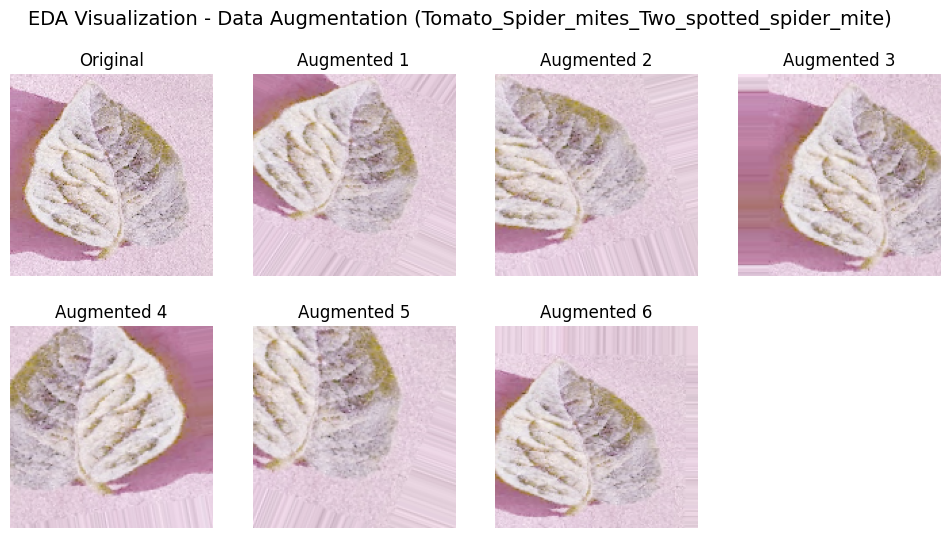

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# ---------------- Step 1: Pick one class and one image ----------------
class_name = os.listdir(src_root)[0]   # pick first class
sample_class_path = os.path.join(src_root, class_name)
sample_img_name = os.listdir(sample_class_path)[0]   # pick first image
sample_img_path = os.path.join(sample_class_path, sample_img_name)

print(f"[INFO] Using sample image from class: {class_name} -> {sample_img_name}")

# ---------------- Step 2: Load the image ----------------
img = load_img(sample_img_path, target_size=(150, 150))  # resize for display
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# ---------------- Step 3: Define augmentation ----------------
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# ---------------- Step 4: Generate multiple augmented versions ----------------
augmented_images = []
for batch in datagen.flow(x, batch_size=1):
    augmented_images.append(batch[0].astype("uint8"))
    if len(augmented_images) >= 6:  # collect 6 samples
        break

# ---------------- Step 5: Plot original + augmented ----------------
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(2, 4, 1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

# Augmented images
for i, aug_img in enumerate(augmented_images):
    plt.subplot(2, 4, i+2)
    plt.imshow(aug_img)
    plt.title(f"Augmented {i+1}")
    plt.axis("off")

plt.suptitle(f"EDA Visualization - Data Augmentation ({class_name})", fontsize=14)
plt.show()


#### 04. Color Space conversion

In [ ]:

import cv2
import os
from pathlib import Path
import numpy as np

# Paths
SRC_ROOT = Path("/content/Y2_S1_Batch02_Ku28/data/processed_retinex")
DST_ROOT = Path("/content/Y2_S1_Batch02_Ku28/data/technic 5")
DST_ROOT.mkdir(parents=True, exist_ok=True)

# Supported extensions
EXTS = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff")

def reduce_color_depth(img, levels=8):
    factor = 256 // levels
    img_reduced = (img // factor) * factor
    return img_reduced.astype(np.uint8)

processed_count = 0

for src_dir, dirs, files in os.walk(SRC_ROOT):
    rel_dir = Path(src_dir).relative_to(SRC_ROOT)
    dst_dir = DST_ROOT / rel_dir
    dst_dir.mkdir(parents=True, exist_ok=True)

    for fname in files:
        if not fname.lower().endswith(EXTS):
            continue

        src_path = Path(src_dir) / fname
        dst_path = dst_dir / fname

        img_bgr = cv2.imread(str(src_path))
        if img_bgr is None:
            print(f"⚠️ Skipping unreadable file: {src_path}")
            continue

        # Convert to RGB
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

        # Apply color depth reduction
        reduced_img = reduce_color_depth(img_rgb, levels=8)

        # Convert back to BGR for saving
        reduced_bgr = cv2.cvtColor(reduced_img, cv2.COLOR_RGB2BGR)

        # Save processed image
        cv2.imwrite(str(dst_path), reduced_bgr)

        processed_count += 1
        if processed_count % 200 == 0:
            print(f"Processed {processed_count} images...")

print(f"✅ Done! Total processed: {processed_count}")
print(f"Saved to: {DST_ROOT}")


Processed 200 images...
Processed 400 images...
Processed 600 images...
Processed 800 images...
Processed 1000 images...
Processed 1200 images...
Processed 1400 images...
Processed 1600 images...
Processed 1800 images...
Processed 2000 images...
Processed 2200 images...
Processed 2400 images...
Processed 2600 images...
Processed 2800 images...
Processed 3000 images...
Processed 3200 images...
Processed 3400 images...
Processed 3600 images...
Processed 3800 images...
Processed 4000 images...
Processed 4200 images...
Processed 4400 images...
Processed 4600 images...
Processed 4800 images...
Processed 5000 images...
Processed 5200 images...
Processed 5400 images...
Processed 5600 images...
Processed 5800 images...
Processed 6000 images...
Processed 6200 images...
Processed 6400 images...
Processed 6600 images...
Processed 6800 images...
Processed 7000 images...
Processed 7200 images...
Processed 7400 images...
Processed 7600 images...
Processed 7800 images...
Processed 8000 images...
Proc

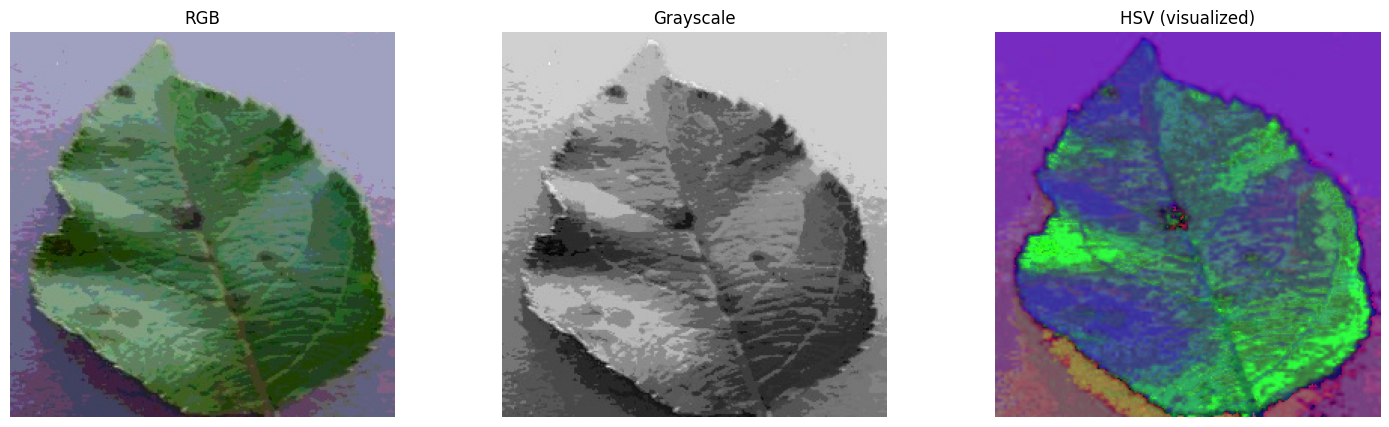

In [ ]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path


# CONFIG
IMG_PATH = Path("/content/Y2_S1_Batch02_Ku28/data/technic 5/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG")


# Load and preprocess
img_bgr = cv2.imread(str(IMG_PATH))
if img_bgr is None:
    raise FileNotFoundError(f"⚠️ Could not read image: {IMG_PATH}")

# Convert to RGB (for plotting)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Convert into different color spaces
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
hsv  = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
lab  = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)

# Visualization
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].imshow(img_rgb); axs[0].set_title("RGB"); axs[0].axis("off")
axs[1].imshow(gray, cmap="gray"); axs[1].set_title("Grayscale"); axs[1].axis("off")
axs[2].imshow(hsv); axs[2].set_title("HSV (visualized)"); axs[2].axis("off")

plt.show()

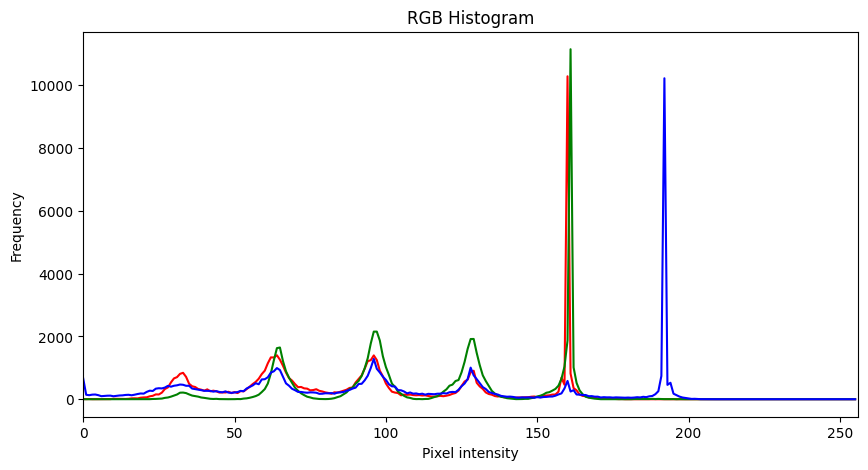

In [ ]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

# CONFIG
IMG_PATH = Path("/content/Y2_S1_Batch02_Ku28/data/technic 5/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG")

# Load image
img_bgr = cv2.imread(str(IMG_PATH))
if img_bgr is None:
    raise FileNotFoundError(f"⚠️ Could not read image: {IMG_PATH}")

# Convert to RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Plot histogram
colors = ('r','g','b')
plt.figure(figsize=(10,5))
for i, col in enumerate(colors):
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])

plt.title("RGB Histogram")
plt.xlabel("Pixel intensity")
plt.ylabel("Frequency")
plt.show()


#### 05.Noise Reduction

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Input dataset path
input_dir = "/content/Y2_S1_Batch02_Ku28/data/technic 5"

# Output dataset path (new cleaned dataset)
output_dir = "/content/Y2_S1_Batch02_Ku28/data/technic 6"

# Create output directory if not exist
os.makedirs(output_dir, exist_ok=True)

# Loop through each class folder
for class_name in os.listdir(input_dir):
    class_path = os.path.join(input_dir, class_name)

    if os.path.isdir(class_path):  # check if it's a folder
        save_class_path = os.path.join(output_dir, class_name)
        os.makedirs(save_class_path, exist_ok=True)

        # Loop through images in each class folder
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)

            # Read image
            img = cv2.imread(img_path)
            if img is None:
                continue  # skip if not a valid image

            # Apply Median Filter (best for plant leaf spots)
            denoised = cv2.medianBlur(img, 5)

            # Save result
            save_path = os.path.join(save_class_path, img_name)
            cv2.imwrite(save_path, denoised)

print("✅ All images processed and saved in:", output_dir)


✅ All images processed and saved in: /content/Y2_S1_Batch02_Ku28/data/technic 6


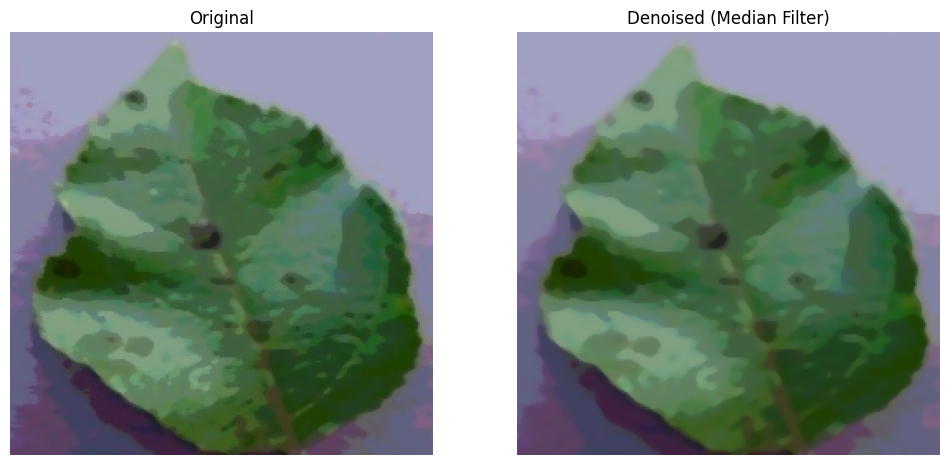

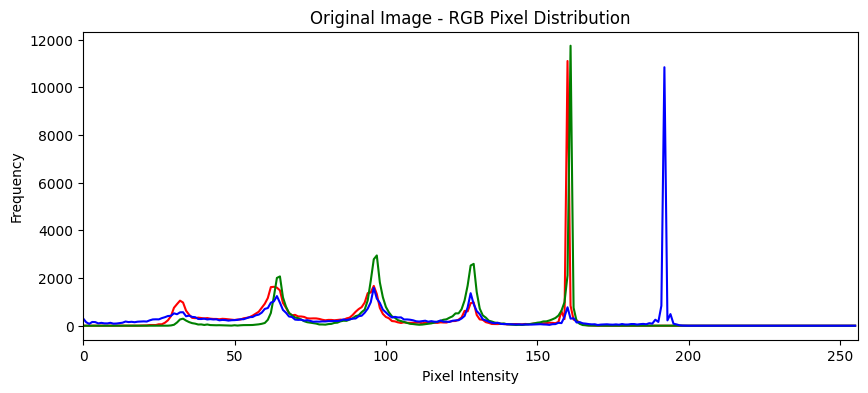

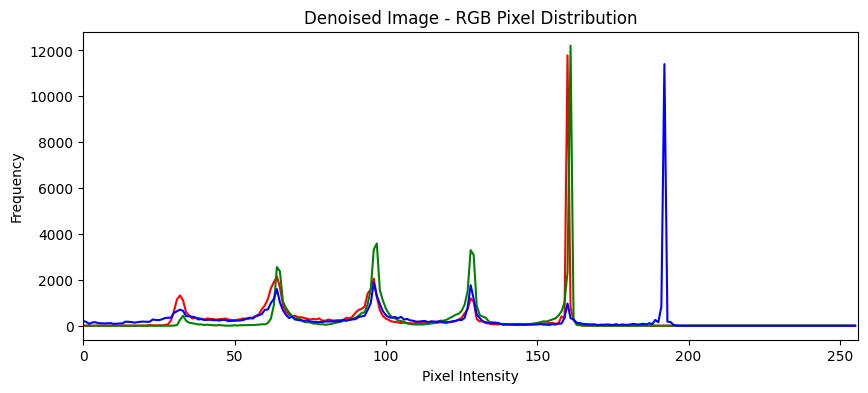

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Example image path (pick one from your dataset)
img_path = "/content/Y2_S1_Batch02_Ku28/data/technic 6/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG"

# Read image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Apply Median filter (noise reduction)
denoised = cv2.medianBlur(img, 5)

# 📌 Function to plot RGB histograms
def plot_histogram(image, title):
    colors = ('r', 'g', 'b')
    plt.figure(figsize=(10,4))
    for i, col in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0,256])
        plt.plot(hist, color=col)
        plt.xlim([0,256])
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Show images
plt.figure(figsize=(12,6))
plt.subplot(1,2,1); plt.imshow(img); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(denoised); plt.title("Denoised (Median Filter)"); plt.axis("off")
plt.show()

# Plot histograms for comparison
plot_histogram(img, "Original Image - RGB Pixel Distribution")
plot_histogram(denoised, "Denoised Image - RGB Pixel Distribution")


#### 06.Data Segmentation

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


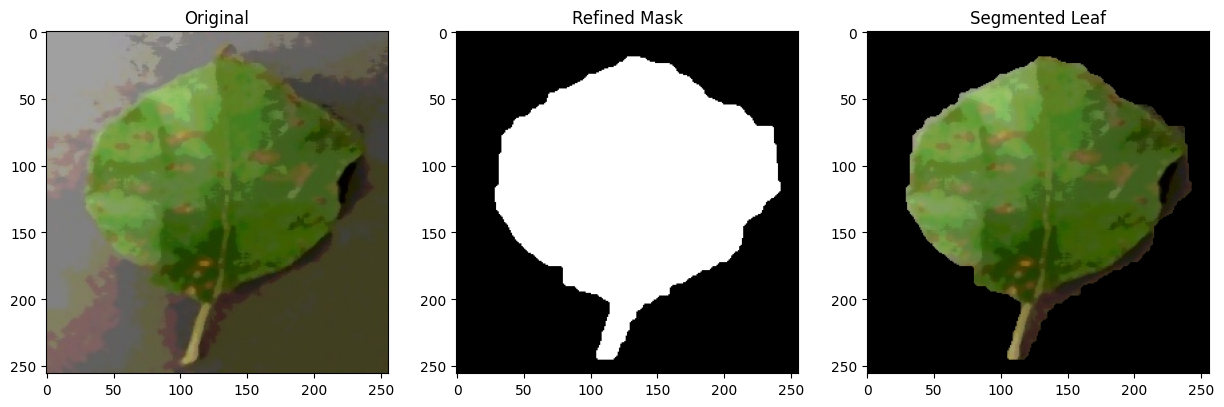

In [ ]:
image_path = "/content/Y2_S1_Batch02_Ku28/data/technic 6/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG"

import cv2
import numpy as np
import matplotlib.pyplot as plt

def refine_mask(mask):
    """Apply morphological operations & smoothing to clean the mask"""
    kernel = np.ones((7,7), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # fill small holes
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)   # remove noise
    mask = cv2.GaussianBlur(mask, (5,5), 0)                 # smooth edges
    return mask

def segment_leaf(image_path):
    # Load image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Initialize mask and models for GrabCut
    mask = np.zeros(img.shape[:2], np.uint8)
    bgdModel = np.zeros((1,65), np.float64)
    fgdModel = np.zeros((1,65), np.float64)

    # Rectangle covering the leaf (use whole image minus small margin)
    h, w = img.shape[:2]
    rect = (10, 10, w-20, h-20)

    # Apply GrabCut
    cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

    # Convert GrabCut result to binary mask
    mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')

    # Refine mask
    mask2 = refine_mask(mask2)

    # Apply mask to image
    segmented = img * mask2[:, :, np.newaxis]

    return img, mask2, segmented


# ==============================
# 🔹 Test with one sample image
# ==============================


original, mask, segmented = segment_leaf(image_path)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(original)

plt.subplot(1,3,2)
plt.title("Refined Mask")
plt.imshow(mask, cmap='gray')

plt.subplot(1,3,3)
plt.title("Segmented Leaf")
plt.imshow(segmented)

plt.show()


In [ ]:
!pip install opencv-python-headless matplotlib seaborn


In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# ========== Mask Refinement ==========
def refine_mask(mask):
    kernel = np.ones((7,7), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # fill small holes
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)   # remove noise
    mask = cv2.GaussianBlur(mask, (5,5), 0)                 # smooth edges
    return mask

# ========== Segmentation Function ==========
def segment_leaf(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None, None, None

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    mask = np.zeros(img.shape[:2], np.uint8)
    bgdModel = np.zeros((1,65), np.float64)
    fgdModel = np.zeros((1,65), np.float64)

    h, w = img.shape[:2]
    rect = (10, 10, w-20, h-20)

    try:
        cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
    except:
        return img, None, None

    mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
    mask2 = refine_mask(mask2)

    segmented = img * mask2[:, :, np.newaxis]
    return img, mask2, segmented

# ========== Process Full Dataset ==========
input_dir = "/content/Y2_S1_Batch02_Ku28/data/technic 6"
output_dir = "/content/Y2_S1_Batch02_Ku28/results/Output"

for root, dirs, files in os.walk(input_dir):
    for file in files:
        if file.lower().endswith((".jpg", ".png", ".jpeg")):
            in_path = os.path.join(root, file)

            # relative path for class folder structure
            rel_path = os.path.relpath(in_path, input_dir)
            out_path = os.path.join(output_dir, rel_path)
            os.makedirs(os.path.dirname(out_path), exist_ok=True)

            _, mask, segmented = segment_leaf(in_path)
            if segmented is not None:
                cv2.imwrite(out_path, cv2.cvtColor(segmented, cv2.COLOR_RGB2BGR))


In [ ]:
import seaborn as sns

# 1. Count of images per class
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="label", order=df['label'].value_counts().index)
plt.title("Number of Images per Class")
plt.xticks(rotation=20)
plt.show()

# 2. Image size distribution
plt.figure(figsize=(10,5))
sns.histplot(df["width"], kde=True, color="blue", label="Width")
sns.histplot(df["height"], kde=True, color="orange", label="Height")
plt.legend()
plt.title("Image Size Distribution")
plt.show()

# 3. Show sample images per class
classes = df["label"].unique()
plt.figure(figsize=(12, 6))
for i, cls in enumerate(classes[:6]):  # show up to 6 classes
    sample = df[df["label"] == cls].sample(1).iloc[0]
    img = cv2.imread(sample["output_path"])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.suptitle("Sample Segmented Leaves from Each Class", fontsize=14)
plt.show()
